# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [48]:
import pandas as pd
import numpy as np
import sys
import codecs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1
import tensorflow as tf

In [49]:
#LOAD THE DATA
data_path = "water_potability.csv"  # Ensure the path is correct
df = pd.read_csv(data_path)

In [50]:
# Handle missing values
df = df.fillna(df.mean())

In [51]:
# Features and target
X = df.drop(columns=['Potability'])  # Features
y = df['Potability']

In [52]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [53]:
# PCA for visualization (optional)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

Plot the Data Appropriately

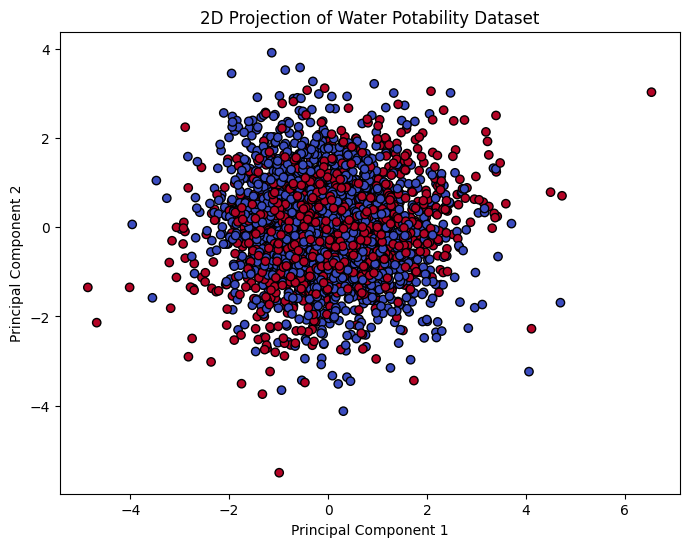

In [54]:
# 2D Visualization of the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("2D Projection of Water Potability Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [55]:
# Split dataset (70% train, 15% validation, 15% test)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

# Print shapes
print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

Training set: (2293, 9), Validation set: (491, 9), Test set: (492, 9)


In [56]:
# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Each Memeber Defines their model Here

In [57]:
# Model definition by Justice
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(32, activation='relu', kernel_regularizer=l1(0.01)),
        Dropout(0.3),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
    )
    return model

In [ ]:
#Model Definition by member 2
def model_name_of_student():

  return

In [ ]:
#Model Definition by member 3
def model_name_of_student():

  return

# Start the training Process

In [58]:
# Check class distribution
unique, counts = np.unique(y_train, return_counts=True)
print("Class distribution:", dict(zip(unique, counts)))

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

print("Class Weights:", class_weight_dict)

Class distribution: {0: 1398, 1: 895}
Class Weights: {0: 0.8201001430615165, 1: 1.2810055865921788}


Epoch 1/200
72/72 [==============================] - 1s 8ms/step - loss: 2.6237 - accuracy: 0.4741 - precision_11: 0.3753 - recall_11: 0.5229 - val_loss: 2.0768 - val_accuracy: 0.4868 - val_precision_11: 0.3891 - val_recall_11: 0.5602
Epoch 2/200
72/72 [==============================] - 0s 3ms/step - loss: 1.6768 - accuracy: 0.5011 - precision_11: 0.3955 - recall_11: 0.5263 - val_loss: 1.3132 - val_accuracy: 0.5010 - val_precision_11: 0.4082 - val_recall_11: 0.6283
Epoch 3/200
72/72 [==============================] - 0s 4ms/step - loss: 1.0689 - accuracy: 0.5321 - precision_11: 0.4165 - recall_11: 0.4961 - val_loss: 0.8724 - val_accuracy: 0.6069 - val_precision_11: 0.4929 - val_recall_11: 0.3613
Epoch 4/200
72/72 [==============================] - 0s 4ms/step - loss: 0.7911 - accuracy: 0.5539 - precision_11: 0.4445 - recall_11: 0.5732 - val_loss: 0.7447 - val_accuracy: 0.5886 - val_precision_11: 0.4744 - val_recall_11: 0.5340
Epoch 5/200
72/72 [==============================] - 0s 4ms/

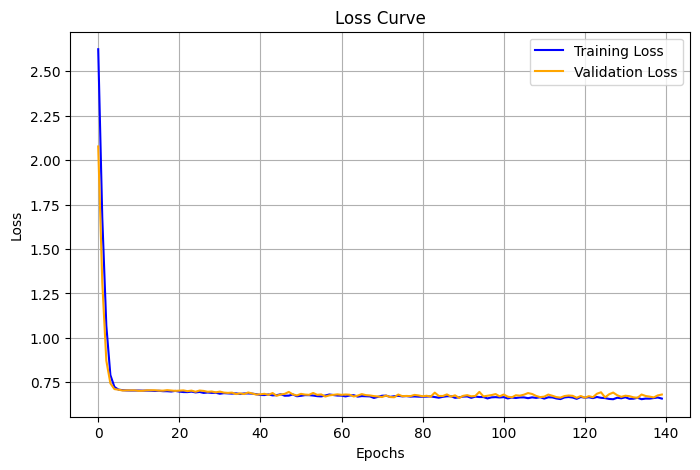

In [60]:
# Initialize the model
model = create_model()

# EarlyStopping callback
es = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[es],
    class_weight=class_weight_dict,
    verbose=1
)

# Evaluate the model on training and test data
train_loss, train_acc, train_precision, train_recall = model.evaluate(X_train, y_train, verbose=1)
test_loss, test_acc, test_precision, test_recall = model.evaluate(X_test, y_test, verbose=1)

# Predict probabilities for test data
y_pred_probs = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("📊 Model Evaluation Metrics:")
print(f"✅ Train Loss: {train_loss:.3f}, Train Accuracy: {train_acc:.3f}")
print(f"✅ Test Loss: {test_loss:.3f}, Test Accuracy: {test_acc:.3f}")
print(f"✅ Precision: {precision:.3f}")
print(f"✅ Recall: {recall:.3f}")
print(f"✅ F1 Score: {f1:.3f}")

# Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.grid(True)
plt.show()